# Representation Learning with Contrastive Predictive Coding

code from : https://github.com/davidtellez/contrastive-predictive-coding

https://awesomeopensource.com/project/davidtellez/contrastive-predictive-coding

Ref: https://mf1024.github.io/2019/05/27/contrastive-predictive-coding/



In [1]:
from data_utils import MnistGenerator
from os.path import join, basename, dirname, exists
import keras
import tensorflow

import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

config = tensorflow.ConfigProto( device_count = {'GPU': 1 , 'CPU': 16} ) 
config.gpu_options.allow_growth = True
sess = tensorflow.Session(config=config) 
keras.backend.set_session(sess)

Using TensorFlow backend.


In [2]:
image_size=64
batch_size=64
color=False
# Prepare data
train_data = MnistGenerator(batch_size, subset='train', image_size=image_size, color=color, rescale=True)

validation_data = MnistGenerator(batch_size, subset='valid', image_size=image_size, color=color, rescale=True)

In [40]:
encoder_path='models/64x64/encoder.h5'
encoder = keras.models.load_model(encoder_path)

/home/yoyo/anaconda3/envs/dti_alpr/lib/python3.7/site-packages/keras/engine/saving.py:292: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


In [42]:
encoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 64, 64, 3)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 31, 31, 64)        1792      
_________________________________________________________________
batch_normalization_1 (Batch (None, 31, 31, 64)        256       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 15, 15, 64)        36928     
_________________________________________________________________
batch_normalization_2 (Batch (None, 15, 15, 64)        256       
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 15, 15, 64)        0         
__________

In [41]:
supervised_path='models/64x64/supervised.h5'
supervised = keras.models.load_model(supervised_path)



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where




In [43]:
supervised.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 64, 64, 3)         0         
_________________________________________________________________
encoder (Model)              (None, 128)               295232    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
batch_normalization_1 (Batch (None, 128)               512       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 313,546
Trainable params: 18,058
Non-trainable params: 295,488
_________________________________________________________________

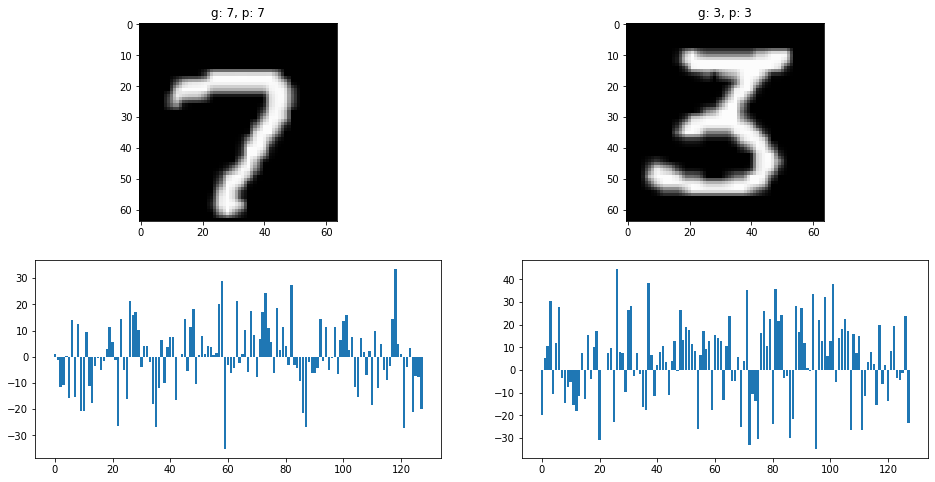

In [99]:
x, y = next(train_data)

embed = encoder.predict(x)
pred = supervised.predict(x)

plt.figure(figsize=[16,8])
for i in range(2):
    plt.subplot(2,2,i+1)
    plt.imshow((x[i] + 1.)/2.)
    plt.title(f'g: {np.argmax(y[i])}, p: {np.argmax(pred[i])}')
    plt.subplot(2,2,i+3)
    plt.bar(range(128), embed[i])
plt.show()

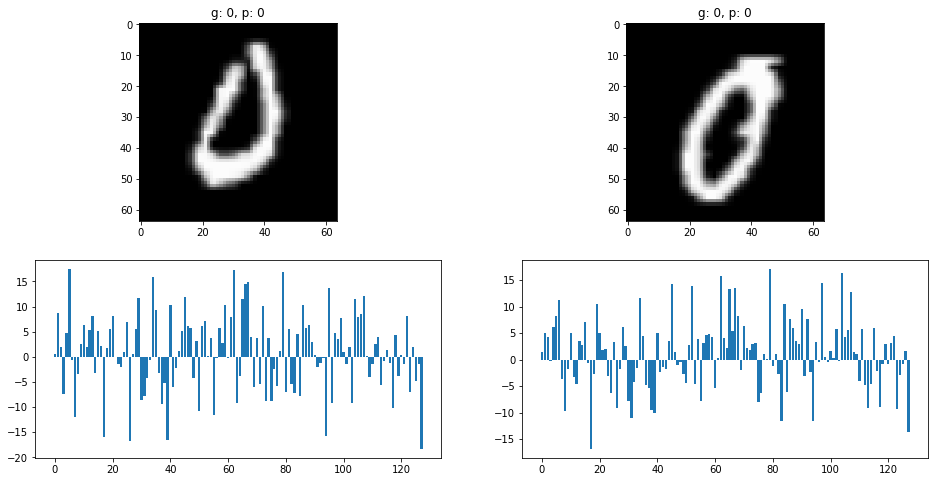

In [101]:
x, y = next(validation_data)

embed = encoder.predict(x)
pred = supervised.predict(x)

plt.figure(figsize=[16,8])
for i in range(2):
    plt.subplot(2,2,i+1)
    plt.imshow((x[i] + 1.)/2.)
    plt.title(f'g: {np.argmax(y[i])}, p: {np.argmax(pred[i])}')
    plt.subplot(2,2,i+3)
    plt.bar(range(128), embed[i])
plt.show()

In [108]:
embeds = []
ys = []

for i in range(10):
    x, y = next(validation_data)
    embed = encoder.predict(x)
    embeds.extend(embed)
    ys.extend(y)

In [142]:
import numpy as np
from sklearn.manifold import TSNE
X = np.array(embeds)
X_embedded = TSNE(n_components=2).fit_transform(X)
Y = np.argmax(ys,axis=1)

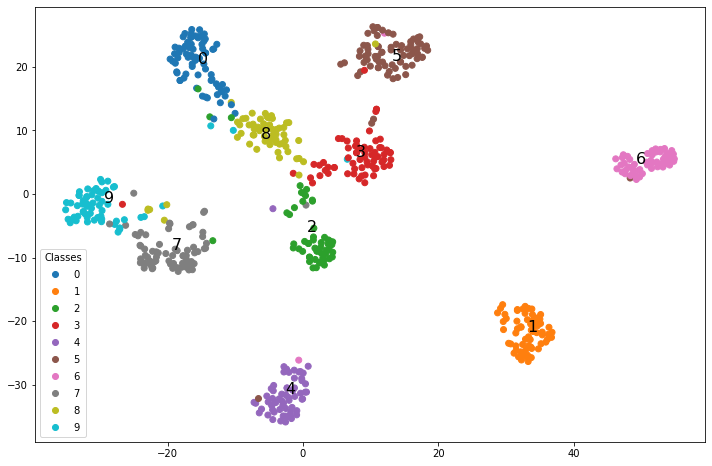

In [143]:
# Plot our dataset.
fig = plt.figure(figsize=(12, 8))
scatter = plt.scatter(X_embedded[:,0], X_embedded[:,1], c=Y, cmap='tab10')

# produce a legend with the unique colors from the scatter
plt.legend(*scatter.legend_elements(), title="Classes")

for i in np.unique(Y):
    idx = Y == i
    plt.text(X_embedded[idx,0].mean(), X_embedded[idx,1].mean(), i, fontsize=16)

plt.show()

In [196]:
from data_utils import SortedNumberGenerator
batch_size=32
terms=4
predict_terms=4
image_size=64
color=True

train_data = SortedNumberGenerator(batch_size=batch_size, subset='train', terms=terms,
                                       positive_samples=batch_size // 2, predict_terms=predict_terms,
                                       image_size=image_size, color=color, rescale=True)

validation_data = SortedNumberGenerator(batch_size=batch_size, subset='valid', terms=terms,
                                        positive_samples=batch_size // 2, predict_terms=predict_terms,
                                        image_size=image_size, color=color, rescale=True)

y = 1 if digits in `term` (`x[0]`) and `predict_term` (`x[1]`) are in sequence

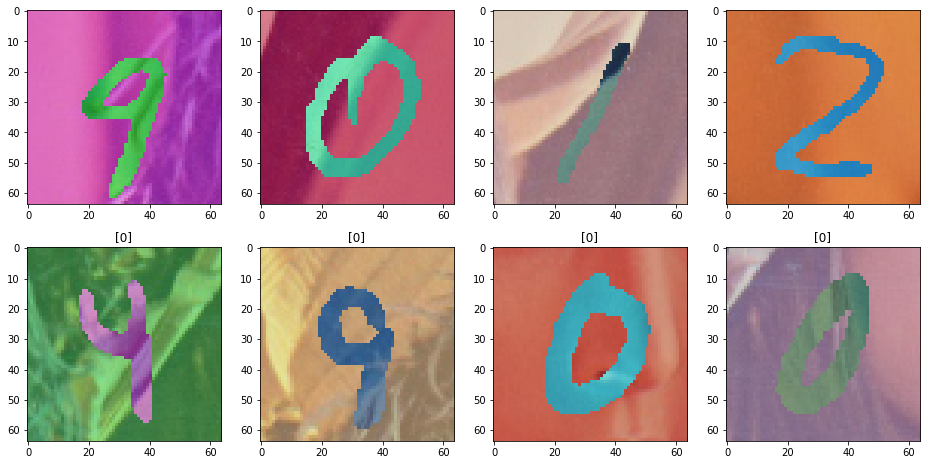

In [197]:
x, y = next(train_data)

plt.figure(figsize=[16,8])
for i in range(4):
    plt.subplot(2,4,i+1)
    plt.imshow((x[0][0][i] + 1.)/2.)
    plt.subplot(2,4,i+5)
    plt.imshow((x[1][0][i] + 1.)/2.)
    plt.title(y[0])
plt.show()

In [198]:
from data_utils import SameNumberGenerator
batch_size=32
terms=4
predict_terms=4
image_size=64
color=True

train_data = SameNumberGenerator(batch_size=batch_size, subset='train', terms=terms,
                                       positive_samples=batch_size // 2, predict_terms=predict_terms,
                                       image_size=image_size, color=color, rescale=True)

validation_data = SameNumberGenerator(batch_size=batch_size, subset='valid', terms=terms,
                                        positive_samples=batch_size // 2, predict_terms=predict_terms,
                                        image_size=image_size, color=color, rescale=True)

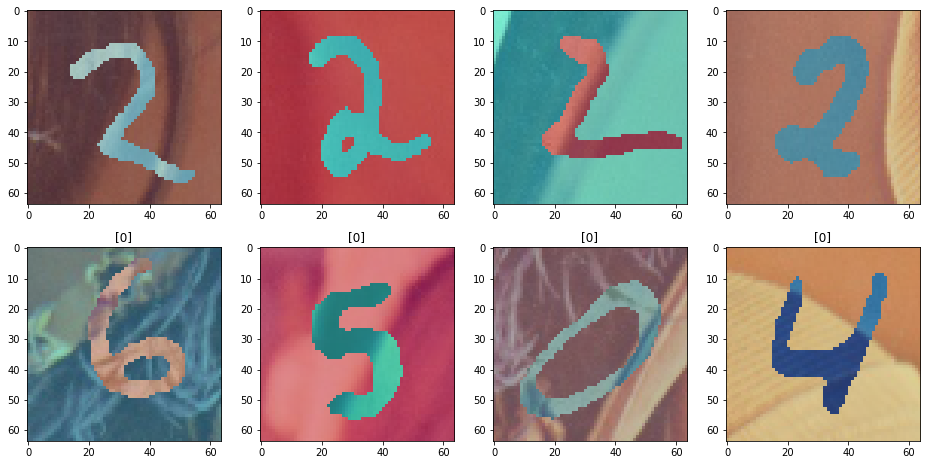

In [203]:
x, y = next(train_data)

plt.figure(figsize=[16,8])
for i in range(4):
    plt.subplot(2,4,i+1)
    plt.imshow((x[0][0][i] + 1.)/2.)
    plt.subplot(2,4,i+5)
    plt.imshow((x[1][0][i] + 1.)/2.)
    plt.title(y[0])
plt.show()